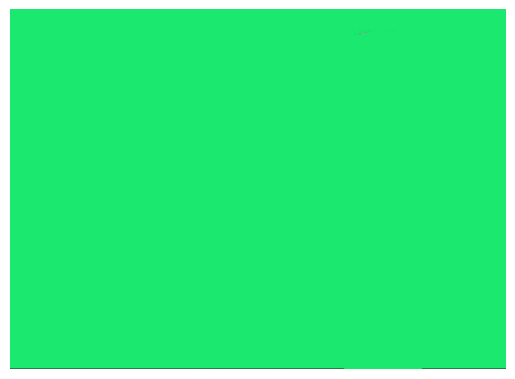

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

background = cv2.imread('background1.png', -1)
person = cv2.imread('object.png', -1)
new_bg = cv2.imread('background2.png', -1)

plt.imshow(background)
plt.axis('off')
plt.show()

# h, w = background.shape[:2]
# background = cv2.resize(background, (w, h))
# person = cv2.resize(person, (w, h))
# new_bg = cv2.resize(new_bg, (w, h))

# bg_gray = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)
# person_gray = cv2.cvtColor(person, cv2.COLOR_BGR2GRAY)

# diff = cv2.absdiff(bg_gray, person_gray)


# Threshold = 30
# _, mask = cv2.threshold(diff, Threshold, 1, cv2.THRESH_BINARY)
# mask_3ch = np.stack((mask, mask, mask), axis=2)

# foreground = person * mask_3ch

# new_background = new_bg * (1 - mask_3ch)
# final_image = foreground + new_background

# plt.imshow(final_image)
# plt.axis('off')
# plt.show()

In [1]:
import cv2
import numpy as np

# =========================
# 1. Đọc ảnh
# =========================
background = cv2.imread("background1.png")      # ảnh nền trống
image = cv2.imread("object.png")                # ảnh có người
new_bg = cv2.imread("background2.png")      # nền mới

print("Background shape:", background.shape)

# Resize cho đồng kích thước
h, w = image.shape[:2]
background = cv2.resize(background, (w, h))
new_bg = cv2.resize(new_bg, (w, h))

# =========================
# 2. Chuyển sang grayscale
# =========================
bg_gray = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# =========================
# 3. Trừ ma trận (absolute difference)
# =========================
diff = cv2.absdiff(img_gray, bg_gray)

# =========================
# 4. Ngưỡng hóa tạo mask
# =========================
_, mask = cv2.threshold(diff, 7.5, 1, cv2.THRESH_BINARY)
# cv2.imshow("Difference", diff)
# cv2.imshow("Mask", mask)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# mask có giá trị 0 / 1
# mở rộng mask thành 3 kênh
mask_3ch = np.stack((mask, mask, mask), axis=2)

# =========================
# 5. Tách foreground
# =========================
foreground = image * mask_3ch

# =========================
# 6. Lấy nền mới
# =========================
background_new = new_bg * (1 - mask_3ch)

# =========================
# 7. Cộng ma trận → ảnh output
# =========================
output = foreground + background_new

# =========================
# 8. Hiển thị kết quả
# =========================
# cv2.imshow("Difference", diff)
# cv2.imshow("Mask", mask * 255)
cv2.imshow("Output", output)

cv2.waitKey(0)
cv2.destroyAllWindows()


Background shape: (699, 964, 3)
